# abc operator

In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, tanh, cosh, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from SpectrumCalculator import *

importing Jupyter notebook from SpectrumCalculator.ipynb


In [2]:
#N = 100
N=20
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [3]:
a, b, c = 1.0, 6.0, 1.0
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id 
# L = a*D2 +  b*D1 + c*Id 
Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
# Ladj = a*D2 -  b*D1 + c*Id 
B = (1-x**2)*Id
#B = Id

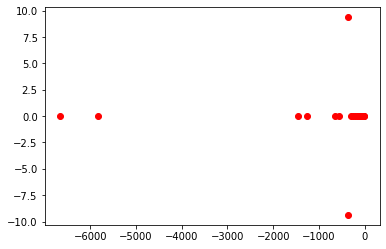

In [4]:
S=SpectrumAlt(L,B);
plt.plot(S.real, S.imag,'ro')
#plt.plot(S[20:N].real, S[20:N].imag,'ro')

In [5]:
##########################################################################################
# Spectral Analysis Tools
##########################################################################################

def Pseudospectrum(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl) :
    """
    Implement Pseudo-Spectrum of a matrix L
    """
    from scipy import linalg as LA
    
    ### 1. Preparation of tools 
    sizeL = np.shape(L)
    if  np.shape(L)[0]!= np.shape(L)[1]:
        print("Non-square Matrix!!! ")
    else : 
        n = np.shape(L)[0]
    N = n/2 - 1
   
    ### 2. Calculation of the Spectrum (eigenvalues)
    #eigenvalues_L, eigenvectors_L = LA.eig(L,B)
    eigenvalues_L = LA.eigvals(L,B)


    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    
    ### 3. Evaluation of the Pseudospectrum
    
    ### 3.1 Grid for Pseudospectrum calculation
    [X,Y] = np.mgrid[xmin:xmax:Nxgrid*1j,ymin:ymax:Nygrid*1j]

    Z = X + 1j*Y

    ### 3.2 Construction of the "height function" given by the min of the SVP
    Id =  np.eye(n)
    Sigma_min = np.zeros((Nxgrid,Nygrid))
    

    for i in np.arange(0, Nxgrid):
        for j in np.arange(0, Nygrid):
            L_shift = L - Z[i,j]*B*Id            
            Sigma_min[i,j] = min(np.linalg.svd(L_shift, full_matrices=True)[1]) 

    
    ### 3.3 Graphical output
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(eigenvalues_L_Re, eigenvalues_L_Im, '+', markersize=1)
     
    if fl == "f" :
        CS = ax.contourf(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    elif fl == "c" : 
        CS = ax.contour(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    else :
        print("\n Pseudospectrum output: \n No 'contour/filled' version could be identified.\n Filled version is assumed.\n")
        CS = ax.contourf(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)

    CB = fig.colorbar(CS)
    ax.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax.set_ylabel(r'$\mathrm{Im}(\omega_n)$')    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig.suptitle(r'Spectrum and Pseudospectrum of $L$' )
    ax.axis('scaled')
    #ax.axis('equal','datalim')
    ax.axis([xmin,xmax,ymin,ymax])
    ax.grid()   
    #ax.set_xlim(xmin,xmax)
    #ax.set_ylim(ymin,ymax)

    fig.show()
    print("\n N =\n",N)
    

In [6]:
#xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -20., 500., -200., 200., 75, 75
xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -200., 10., -40., 40., 75, 75
heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
#heights = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0, 1e1, 1e2]
fl = "f"


/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'linewidth'
/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



 N =
 9.5


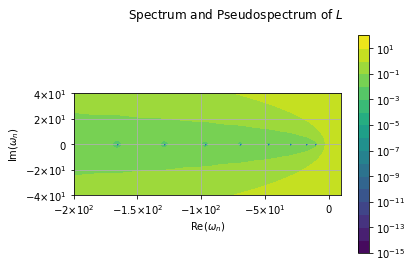

In [7]:
Pseudospectrum(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl)

# Attempt to implement the basic elements of Appendix C, subsection 3.

In [8]:
def Kdelta(i,j):
    if (i==j):
        KroneckerDeltaReturn=1
    else:
        KroneckerDeltaReturn=0
    
    return KroneckerDeltaReturn

In [9]:
def CNmuMatrix(mu) :
    """ 
    Reads an ndarray with the values of the weight function mu at the Chebyshev-Lobatto
    collocation points and returns the matrix C^N_mu
    (following equation C14 in Jaramillo-PanossoMacedo-Al-Sheikh paper)
    """
    n = len(mu)
    N = n-1
    n_grid = np.arange(0, n)
    x_grid = CL_grid(N)
    alpha = np.ones(n)
    alpha[0]=2
    alpha[N]=2
    #list of indices in the sum
    # we add one because we want to include the point floor(N/2) in the arrange.
    Nhalffloor_grid = np.arange(1, int(np.floor(N/2)+1))
    #print("n =" ,  n)
    #print("N =" ,  N)
    #print("Nhalffloor_grid =" ,  Nhalffloor_grid)
    CNmuMatrix=np.zeros((n,n))
    for i in n_grid :
        for j in n_grid :
            if (i==j) :  
                #we construct a list of the elements to be summed up using List comprehension
                ExpressionInSummedUpInListForm = [(Chebyshev(2*k,x_grid[i]))*((2-Kdelta(2*k,N))/(4*(k**2)-1)) for k  in Nhalffloor_grid]
                CNmuMatrix[i,j] = ((2*mu[i])/(alpha[i]*N))*(1-sum(ExpressionInSummedUpInListForm))
            else :               
                CNmuMatrix[i,j] = 0
              
    return CNmuMatrix

### Sanity check. Does one recover the integral of the product of two functions ??

In [10]:
Identitytest = np.ones(4)  #np.array([3., 21., 11., 9.]) #np.ones(4) #CL_grid(3) 
#len(mutest)
Identitytest

array([1., 1., 1., 1.])

In [11]:
CNmuMatrix(Identitytest)
#should this be the identity?

array([[0.11111111, 0.        , 0.        , 0.        ],
       [0.        , 0.88888889, 0.        , 0.        ],
       [0.        , 0.        , 0.88888889, 0.        ],
       [0.        , 0.        , 0.        , 0.11111111]])

In [12]:
TestC=CNmuMatrix((Identitytest))

In [13]:
def fTestFunction(x):
    fTestFunctionReturn =  x**4 #np.cos(x**2) #x**4  #np.log(x**2) 
    return fTestFunctionReturn
def gTestFunction(x):
    gTestFunctionReturn = x**2
    return gTestFunctionReturn

In [14]:
# the f and g test functions used here are polynomials of degree 4 and 2 so we use a higher resolution: 5.
Identitytest = np.ones(5) 
TestC=CNmuMatrix((Identitytest))

In [15]:
import scipy.integrate as integrate
#from scipy.integrate import quad

In [16]:
Integral_Value, Integration_Error_scipy = integrate.quad(lambda x: fTestFunction(x)*gTestFunction(x), -1, 1)
Integral_Value, Integration_Error_scipy

(0.2857142857142857, 3.172065784643304e-15)

In [17]:
def fTestFunctionCollocationPoints(n):
    """ 
    Gives the fTestFunction evaluated at the x[i] collocation point of a Lobatto grid of size n
    """
    N = n-1
    n_grid = np.arange(0, n)
    x_grid = CL_grid(N)
    fTestFunctionAtx= fTestFunction(x_grid) 
    return fTestFunctionAtx  
def gTestFunctionCollocationPoints(n):
    """ 
    Gives the gTestFunction evaluated at the x[i] collocation point of a Lobatto grid of size n
    """
    N = n-1
    n_grid = np.arange(0, n)
    x_grid = CL_grid(N)
    gTestFunctionAtx= gTestFunction(x_grid) 
    return gTestFunctionAtx 

In [18]:
Cg=np.dot(TestC,gTestFunctionCollocationPoints(len(Identitytest)))
fCg=np.dot(fTestFunctionCollocationPoints(len(Identitytest)).transpose(),Cg)
fCg

0.2666666666666667

In [19]:
Relative_error= abs(Integral_Value-fCg)
Relative_error

0.01904761904761898

## Interpolant matrix

In [20]:
#def InterpolationMatrixI(Nbar,N):
def InterpolationMatrixI(nbar,n):
    """ 
    Gives the interpolation matrix for the transition between 
    the interpolant vectors f_Nbar and the f_N with resolutions Nbar and N respectively
    (following equation C18 in Jaramillo-PanossoMacedo-Al-Sheikh paper)
    """
    ####
    Nbar = nbar -1
    #nbar = Nbar + 1
    nbar_grid = np.arange(0, nbar)
    xbar_grid = CL_grid(Nbar)
    #####
    N = n-1
    #n = N + 1
    n_grid = np.arange(0, n)
    x_grid = CL_grid(N)
    #####
    alpha = np.ones(n)
    alpha[0]=2
    alpha[N]=2
    IndexSummation_grid = np.arange(1, n)
    #####
    Interpolant_Matrix=np.zeros((nbar,n))
    for ibar in nbar_grid :
        for i in n_grid :
            ExpressionListToBeSummed = [(2-Kdelta(j,N))*Chebyshev(j,xbar_grid[ibar])*Chebyshev(j,x_grid[i]) for j in IndexSummation_grid ]
            Interpolant_Matrix[ibar,i] = (1/(N*alpha[i]))*(1+sum(ExpressionListToBeSummed))
    return Interpolant_Matrix          


In [21]:
### Sanity check 
InterpolationMatrixI(3,3)
#This should be the identity

array([[ 1.00000000e+00,  5.55111512e-17,  0.00000000e+00],
       [ 2.77555756e-17,  1.00000000e+00, -5.55111512e-17],
       [ 0.00000000e+00, -1.11022302e-16,  1.00000000e+00]])

In [22]:
np.shape(InterpolationMatrixI(5,4))

(5, 4)

In [23]:
def Matrix_Interpolated(M) :
    """ 
    Reads a matrix M with associated resolution n_high and returns
    the interpolated matrix   I^t M I with resolution n_low = n_high/2
    (following equation C21 in Jaramillo-PanossoMacedo-Al-Sheikh paper)
    """
    n_high=len(M)
    n_low = int(n_high/2)
    I = InterpolationMatrixI(n_high,n_low)
    It = InterpolationMatrixI(n_high,n_low).transpose()
    temp=np.dot(M,I)
    M_interpolated = np.dot(It,temp)
              
    return M_interpolated

### Sanity Check ?

In [24]:
Identitytest_high = np.ones(2*len(Identitytest)) 
TestC_high=CNmuMatrix((Identitytest_high))
InterpolatedTestC=Matrix_Interpolated(TestC_high)

In [25]:
np.shape(InterpolatedTestC)

(5, 5)

In [26]:
Cg_better=np.dot(InterpolatedTestC,gTestFunctionCollocationPoints(len(Identitytest)))
fCg_better=np.dot(fTestFunctionCollocationPoints(len(Identitytest)).transpose(),Cg_better)
fCg_better

0.2857142857142857

In [27]:
Relative_error_better= abs(Integral_Value-fCg_better)
Relative_error_better

0.0

In [28]:
#def w_collocation_points(w,n):
#    """ 
#    Gives the w-function evaluated at the x[i] collocation point of a Lobatto grid of size n
#    """
#    N = n-1
#    n_grid = np.arange(0, n)
#    x_grid = CL_grid(N)
#    wFunctionAtx= w(x_grid) 
#    return wFunctionAtx  

def GramMatrix_abc(w):
    # For the abc operator the Gram Matrix is simple
    # This needs to be changed for a more complicated case such as poschl-teller
    GramMatrix=Matrix_Interpolated(CNmuMatrix(w))
    return GramMatrix

def ConjugateTranspose(A):
    return A.conj().T

def Dagger(Gram_Matrix,M):
    temp=np.dot(ConjugateTranspose(M),Gram_Matrix)
    return np.dot(np.linalg.inv(Gram_Matrix),temp)

def EigenValues_gram(M,Gram_Matrix):
    M_dagger = Dagger(Gram_Matrix,M)
    MdaggerM = np.dot(M_dagger,M)
    eigenvalues_MdaggerM = LA.eigvals(MdaggerM)
    return eigenvalues_MdaggerM 


In [29]:
#np.shape(M_test)

In [30]:
#small test
n_testing_high=10
n_testing_low=np.int(n_testing_high/2)
Identity_testing = np.ones(n_testing_high)
Gram_Matrix_test=GramMatrix_abc(Identity_testing)
M_test=Diagonal_Random_Matrix(n_testing_low)
np.min(np.sqrt(np.abs(EigenValues_gram(M_test,Gram_Matrix_test))))

0.15224805562108043

In [31]:
def Pseudospectrum_gram_norm(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,Gram_Matrix) :
    """
    Implement Pseudo-Spectrum of a matrix L
    """
    from scipy import linalg as LA
    
    ### 1. Preparation of tools 
    sizeL = np.shape(L)
    if  np.shape(L)[0]!= np.shape(L)[1]:
        print("Non-square Matrix!!! ")
    else : 
        n = np.shape(L)[0]
    N = n/2 - 1
    
    #SizeGram =np.shape(Gram_Matrix)
    #if SizeGram != sizeL
    #    print ("Size of Gram Matrix should coincide with Size of L")
    #else:
   
    ### 2. Calculation of the Spectrum (eigenvalues)
    #eigenvalues_L, eigenvectors_L = LA.eig(L,B)
    eigenvalues_L = LA.eigvals(L,B)


    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag

    
    ### 3. Evaluation of the Pseudospectrum
    
    ### 3.1 Grid for Pseudospectrum calculation
    [X,Y] = np.mgrid[xmin:xmax:Nxgrid*1j,ymin:ymax:Nygrid*1j]

    Z = X + 1j*Y

    ### 3.2 Construction of the "height function" given by the min of the SVP
    Id =  np.eye(n)
    Sigma_min = np.zeros((Nxgrid,Nygrid))
    

    for i in np.arange(0, Nxgrid):
        for j in np.arange(0, Nygrid):
            L_shift = L - Z[i,j]*B*Id            
            Sigma_min[i,j] = np.min(np.sqrt(np.abs(EigenValues_gram(L_shift,Gram_Matrix)))) 
            #min(np.linalg.svd(L_shift, full_matrices=True)[1]) 

    
    ### 3.3 Graphical output
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(eigenvalues_L_Re, eigenvalues_L_Im, '+', markersize=1)
     
    if fl == "f" :
        CS = ax.contourf(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    elif fl == "c" : 
        CS = ax.contour(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)
    else :
        print("\n Pseudospectrum output: \n No 'contour/filled' version could be identified.\n Filled version is assumed.\n")
        CS = ax.contourf(X,Y,Sigma_min,heights,locator=ticker.LogLocator(),linewidth=0.5)

    CB = fig.colorbar(CS)
    ax.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax.set_ylabel(r'$\mathrm{Im}(\omega_n)$')    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig.suptitle(r'Spectrum and Pseudospectrum of $L$ using Gram_Matrix' )
    ax.axis('scaled')
    #ax.axis('equal','datalim')
    ax.axis([xmin,xmax,ymin,ymax])
    ax.grid()   
    #ax.set_xlim(xmin,xmax)
    #ax.set_ylim(ymin,ymax)

    fig.show()
    print("\n N =\n",N)
    

#### First test for Pseudospectrum_gram_norm using the weight function = identity.

In [32]:
N = 20
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [33]:
a, b, c = 1.0, 6.0, 1.0
L = a*(1-x**2)*D2 + (-4*a*x + b*(1-x**2))*D1 + (-2*a-2*b*x+c*(1-x**2))*Id 
# L = a*D2 +  b*D1 + c*Id 
Ladj = a*(1-x**2)*D2 + (-4*a*x* - b*(1-x**2))*D1 + (-2*a+2*b*x+c*(1-x**2))*Id
# Ladj = a*D2 -  b*D1 + c*Id 
B = (1-x**2)*Id
#B = Id

In [34]:
w_Identity= np.ones(2*n)
Gram_Matrix_Id=GramMatrix_abc(w_Identity)

/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'linewidth'
/home/gasperin/anaconda3/envs/rel/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



 N =
 9.5


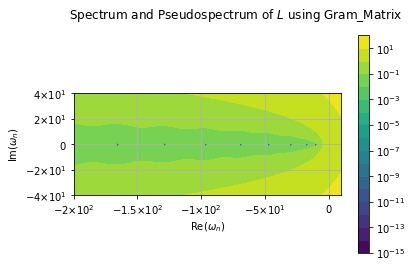

In [35]:
Pseudospectrum_gram_norm(L,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,Gram_Matrix_Id)

### Sturm-Liouville rescaled abc

Given an operator 
$$L = a(x)\frac{d^2}{dx^2} + b(x)\frac{d}{dx} + c(x)$$

Notice that the coefficients are not necessarily constant. The Sturm-Liouville integrating factor 
$w(x)$ is given by

$$ w(x)= \frac{1}{a} exp \int \frac{b}{a} dx$$

For our particular case with
$$a(x) = a_0 (1 - x^2) , \qquad b(x) = - 4 a_0 x + b_0(1-b_0 x^2) , \qquad c(x) = (-2a_0-2b_0x+c_0(1-x^2)) $$
we have that

$$ w(x) = \frac{b_0 x + 2 a_0 ln(-1 + x^2)}{{a_0}^2 (1 - x^2)} $$


This is a problem for a Lobatto grid and all the formulas we have used for the Gram_Matrix are specialised for that case...

In [36]:
#def wFunction(x,a,b,c):
#    wFunctionReturn = (b*x + 2*a*np.log(-1 + x**2)) /(a**2*(1 - x**2))
#    return wFunctionReturn
#
#def wFunctionCollocationPoints(n,a,b,c):
#    """ 
#    Gives the wFunction evaluated at the x[i] collocation point of a Lobatto grid of size n
#    """
#    N = n-1
#    n_grid = np.arange(0, n)
#    D1_CG(N)[0]
#    x_grid = D1_CG(N)[0] #CL_grid(N)
#    wFunctionAtx =  wFunction(x_grid,a,b,c) #(b*x_grid + 2*a*np.log(-1 + x_grid**2)) /(a**2*(1 - x_grid**2)) 
#    return wFunctionAtx

In [40]:
#n_first_test = 5
#w_first_test=wFunctionCollocationPoints(n_first_test,1.0,2.0,1.0)

In [41]:
#w_first_test

In [42]:
#np.log(D1_CG(N)[0])

##### going back to simpler case?

In [62]:
#N = 100
N=100
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CL(N)[0]]
x = np.transpose(xt)
D1 = D1_CL(N)[1]
D2 = D2_CL(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

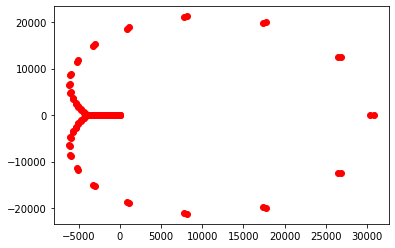

In [65]:
a, b, c = 1.0, 1.0, 1.0
L = a*D2 +  b*D1 + c*Id 
Ladj = a*D2 -  b*D1 + c*Id 
B = Id
S=SpectrumAlt(L,B);
plt.plot(S.real, S.imag,'ro')